# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
    
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Create counters
record_count = 1
set_count = 1

#Create DataFrame
city_data_df = pd.DataFrame({"City" : cities})
city_data_df["Country"] = ""
city_data_df["Date"] = ""      
city_data_df["Latitude"] = ""
city_data_df["Longitude"] = ""
city_data_df["Cloudiness (%)"] = ""
city_data_df["Humidity (%)"] = ""
city_data_df["Max Temp (C)"] = ""
city_data_df["Wind Speed (mph)"] = ""


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Loop through all the cities in our list to fetch weather data
for index, row in city_data_df.iterrows():

    city = row["City"] 
    city_url = url + "appid=" + weather_api_key + "&units=" + unit + "&q=" + city
    city_response = requests.get(city_url).json()

    try:
        print(f"Processing Record {record_count}  of Set {set_count} | {city}.")

        city_data_df.loc[index, "Country"] = city_response["sys"]["country"]     
        city_data_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(city_response["dt"])
        city_data_df.loc[index, "Latitude"] = city_response["coord"]["lat"]
        city_data_df.loc[index, "Longitude"] = city_response["coord"]["lon"]
        city_data_df.loc[index, "Cloudiness (%)"] = city_response["clouds"]["all"]
        city_data_df.loc[index, "Humidity (%)"] = city_response["main"]["humidity"]
        city_data_df.loc[index, "Max Temp (C)"] = city_response["main"]["temp_max"]
        city_data_df.loc[index, "Wind Speed (mph)"] = city_response["wind"]["speed"]
                   
    
    # If an error is experienced, skip the city
    except:
        print(f"City not found...skipping {city}.")
        pass
              
    record_count = record_count +1
    if record_count == 50:
        record_count = 0
        set_count = set_count + 1
# Indicate that Data Loading is complete 

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1  of Set 1 | puerto ayora.
Processing Record 2  of Set 1 | nikolskoye.
Processing Record 3  of Set 1 | barrow.
Processing Record 4  of Set 1 | punta arenas.
Processing Record 5  of Set 1 | kaseda.
Processing Record 6  of Set 1 | bredasdorp.
Processing Record 7  of Set 1 | varnavino.
Processing Record 8  of Set 1 | khatanga.
Processing Record 9  of Set 1 | kamenskoye.
City not found...skipping kamenskoye.
Processing Record 10  of Set 1 | coquimbo.
Processing Record 11  of Set 1 | petropavlovsk-kamchatskiy.
Processing Record 12  of Set 1 | upernavik.
Processing Record 13  of Set 1 | tuggurt.
City not found...skipping tuggurt.
Processing Record 14  of Set 1 | amboasary.
Processing Record 15  of Set 1 | barentsburg.
City not found...skipping barentsburg.
Processing Record 16  of Set 1 | talnakh.
Processing Record 17  of Set 1 | ada.
Processing Record 18  of Set 1 | new norfolk.
Processing Record 19  of Set 1 | b

In [4]:

# Show Record Count
city_data_df.count()

City                591
Country             591
Date                591
Latitude            591
Longitude           591
Cloudiness (%)      591
Humidity (%)        591
Max Temp (C)        591
Wind Speed (mph)    591
dtype: int64

In [5]:
# Display sample data
city_data_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
0,puerto ayora,EC,2023-02-07 17:30:55,-0.7393,-90.3518,29,91,28.98,4.47
1,nikolskoye,RU,2023-02-07 17:33:41,59.7035,30.7861,99,88,-1.06,4.5
2,barrow,US,2023-02-07 17:33:41,71.2906,-156.7887,100,78,-18.99,0
3,punta arenas,CL,2023-02-07 17:30:40,-53.15,-70.9167,75,59,16.06,6.69
4,kaseda,JP,2023-02-07 17:33:42,31.4167,130.3167,96,77,11.11,5.29
...,...,...,...,...,...,...,...,...,...
586,chapais,CA,2023-02-07 17:39:59,49.7834,-74.8492,100,95,-7.12,5.37
587,beaverlodge,CA,2023-02-07 17:40:00,55.2166,-119.4361,91,89,-0.36,1.1
588,cumberland,US,2023-02-07 17:40:00,35.0502,-78.8664,0,31,18.28,4.63
589,sable-sur-sarthe,FR,2023-02-07 17:40:00,47.8376,-0.3329,8,83,1.63,3.29


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
City_ID,,,,,,,,,
0,puerto ayora,EC,2023-02-07 17:30:55,-0.7393,-90.3518,29.0,91.0,28.98,4.47
1,nikolskoye,RU,2023-02-07 17:33:41,59.7035,30.7861,99.0,88.0,-1.06,4.50
2,barrow,US,2023-02-07 17:33:41,71.2906,-156.7887,100.0,78.0,-18.99,0.00
3,punta arenas,CL,2023-02-07 17:30:40,-53.1500,-70.9167,75.0,59.0,16.06,6.69
4,kaseda,JP,2023-02-07 17:33:42,31.4167,130.3167,96.0,77.0,11.11,5.29


In [8]:
city_data_df.dtypes


City                 object
Country              object
Date                 object
Latitude            float64
Longitude           float64
Cloudiness (%)      float64
Humidity (%)        float64
Max Temp (C)        float64
Wind Speed (mph)    float64
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

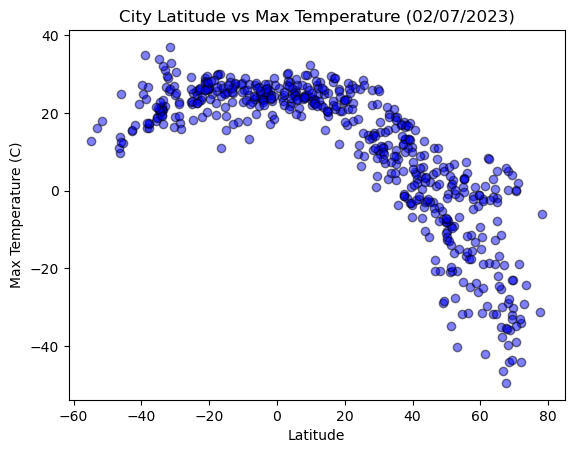

In [9]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp (C)"], facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs Max Temperature ({today})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

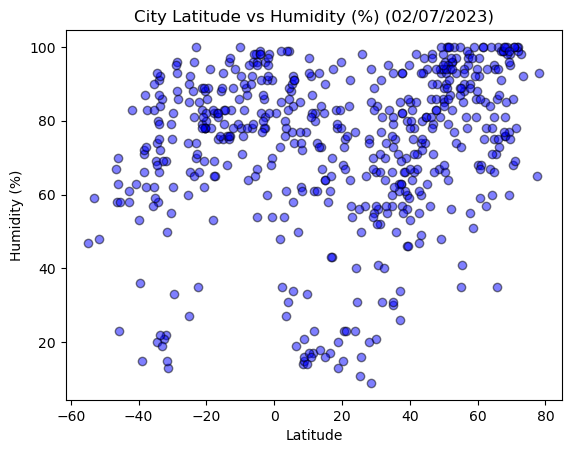

In [10]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity (%)"], facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

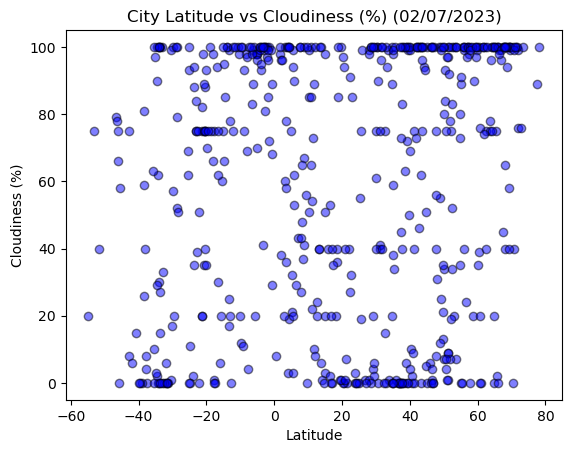

In [11]:
# Build the scatter plots for latitude vs. cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness (%)"], facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (%) ({today})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

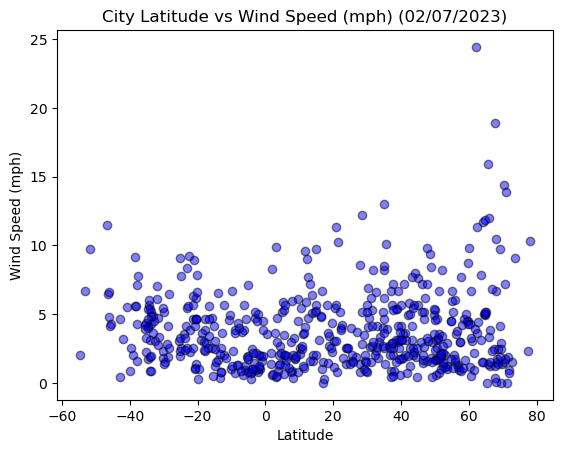

In [12]:
# Build the scatter plots for latitude vs. wind speed
today = time.strftime("%m/%d/%Y")
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed (mph)"], facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed (mph) ({today})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df  = city_data_df.loc[city_data_df["Latitude"] > 0]

# Display sample data
northern_hemi_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
City_ID,,,,,,,,,
1,nikolskoye,RU,2023-02-07 17:33:41,59.7035,30.7861,99.0,88.0,-1.06,4.50
2,barrow,US,2023-02-07 17:33:41,71.2906,-156.7887,100.0,78.0,-18.99,0.00
4,kaseda,JP,2023-02-07 17:33:42,31.4167,130.3167,96.0,77.0,11.11,5.29
6,varnavino,RU,2023-02-07 17:33:43,57.4035,45.0916,98.0,98.0,-15.56,2.94
7,khatanga,RU,2023-02-07 17:33:43,71.9667,102.5000,76.0,100.0,-44.00,0.93
...,...,...,...,...,...,...,...,...,...
585,shimoda,JP,2023-02-07 17:39:59,34.6667,138.9500,89.0,76.0,8.95,2.69
586,chapais,CA,2023-02-07 17:39:59,49.7834,-74.8492,100.0,95.0,-7.12,5.37
587,beaverlodge,CA,2023-02-07 17:40:00,55.2166,-119.4361,91.0,89.0,-0.36,1.10


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df  = city_data_df.loc[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (C),Wind Speed (mph)
City_ID,,,,,,,,,
0,puerto ayora,EC,2023-02-07 17:30:55,-0.7393,-90.3518,29.0,91.0,28.98,4.47
3,punta arenas,CL,2023-02-07 17:30:40,-53.1500,-70.9167,75.0,59.0,16.06,6.69
5,bredasdorp,ZA,2023-02-07 17:33:43,-34.5322,20.0403,90.0,74.0,19.44,4.01
9,coquimbo,CL,2023-02-07 17:33:44,-29.9533,-71.3436,100.0,82.0,18.85,5.14
13,amboasary,MG,2023-02-07 17:31:09,-25.0333,46.3833,93.0,90.0,22.29,1.98
...,...,...,...,...,...,...,...,...,...
575,la paz,BO,2023-02-07 17:35:43,-16.5000,-68.1500,75.0,81.0,10.99,4.63
579,oliveira,BR,2023-02-07 17:37:41,-20.6964,-44.8272,89.0,89.0,20.29,1.01
580,camana,PE,2023-02-07 17:37:36,-16.6228,-72.7111,62.0,82.0,24.36,3.40


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8496373632086817
y = -0.79x + 34.5


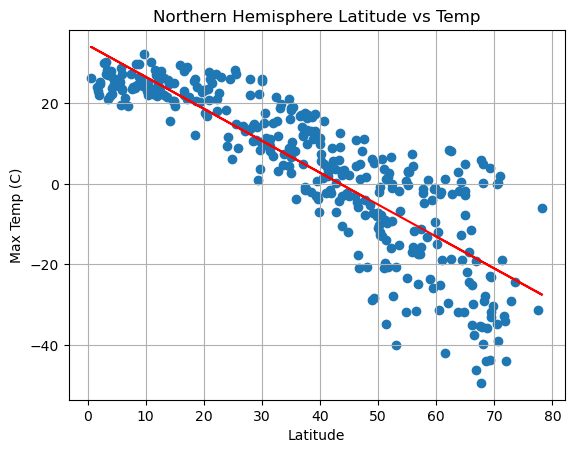

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Max Temp (C)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Max Temp (C)"
#give the title
plt.title('Northern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot1.png")
plt.show()

The r-square is 0.33388882555197336
y = 0.12x + 26.0


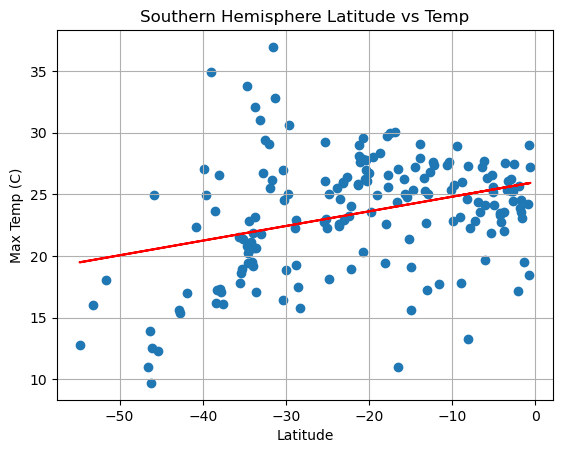

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Max Temp (C)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Max Temp (C)"
#give the title
plt.title('Southern Hemisphere Latitude vs Temp')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot2.png")
plt.show()

**Discussion about the linear relationship:** 

For Northern Hemisphere: The regression displays a negative correlation. As you move away from the equator the temperature decreases. 

For Southern Hemisphere:The regression displays a positive correlation. As you get closer to the equator the temperature increases.


### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.4056994798710855
y = 0.45x + 55.62


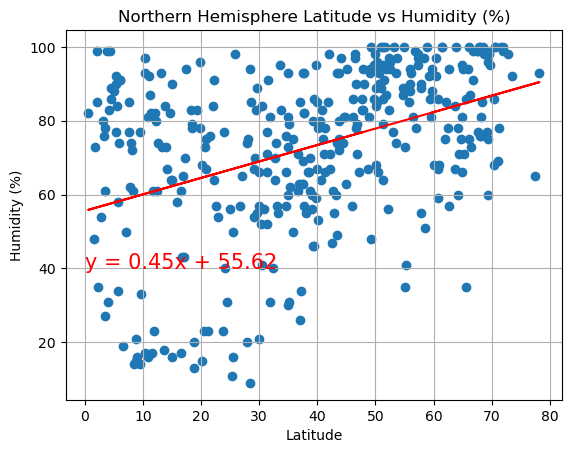

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Humidity (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Humidity (%)"
#give the title
plt.title('Northern Hemisphere Latitude vs Humidity (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot3.png")
plt.show()

The r-square is 0.46842564214405163
y = 0.67x + 88.92


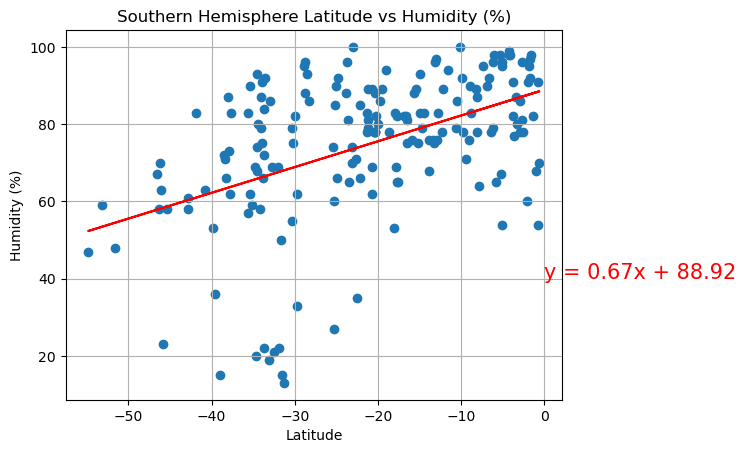

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Humidity (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Humidity (%)"
#give the title
plt.title('Southern Hemisphere Latitude vs Humidity (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot4.png")
plt.show()

**Discussion about the linear relationship:** 

For both Northern and Southern Hemisphere: The regression does not show a strong correlation and the data points also look scaterred. Therefore, there doesnt seem to be a corelation between Latitude and Humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.21563554355271494
y = 0.42x + 42.1


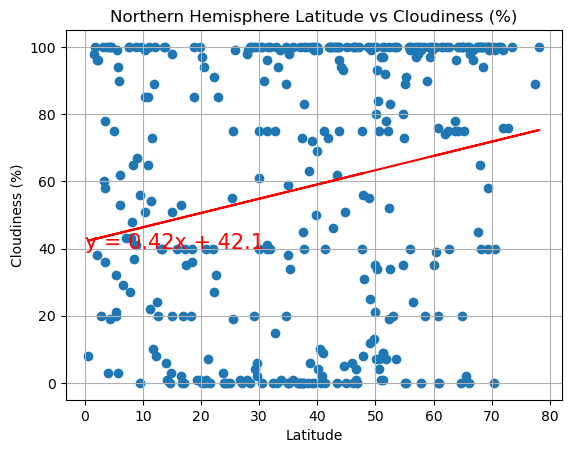

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Cloudiness (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Cloudiness (%)"
#give the title
plt.title('Northern Hemisphere Latitude vs Cloudiness (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot5.png")
plt.show()

The r-square is 0.429183698656455
y = 1.23x + 86.09


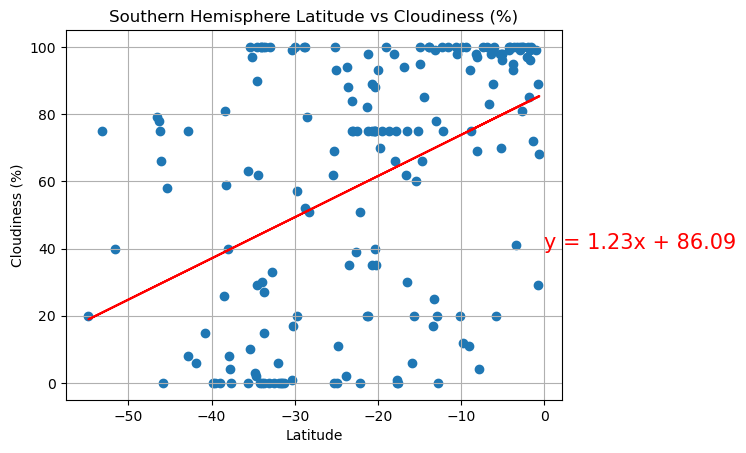

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Cloudiness (%)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Cloudiness (%)"
#give the title
plt.title('Southern Hemisphere Latitude vs Cloudiness (%)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot6.png")
plt.show()

**Discussion about the linear relationship:** 

For both Northern and Southern Hemisphere: The regression does not show a strong correlation and the data points also look scaterred. Therefore, there doesnt seem to be a corelation between Latitude and Humidity.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.12311727277734871
y = 0.02x + 3.09


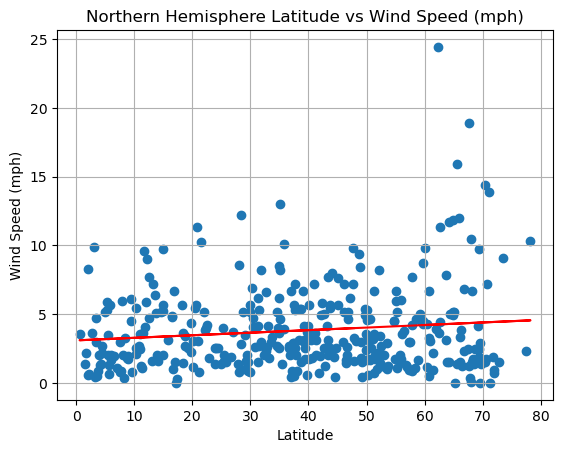

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Latitude"]
y_values = northern_hemi_df["Wind Speed (mph)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Wind Speed (mph)"
#give the title
plt.title('Northern Hemisphere Latitude vs Wind Speed (mph)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot7.png")
plt.show()

The r-square is -0.3732228201539303
y = -0.06x + 2.23


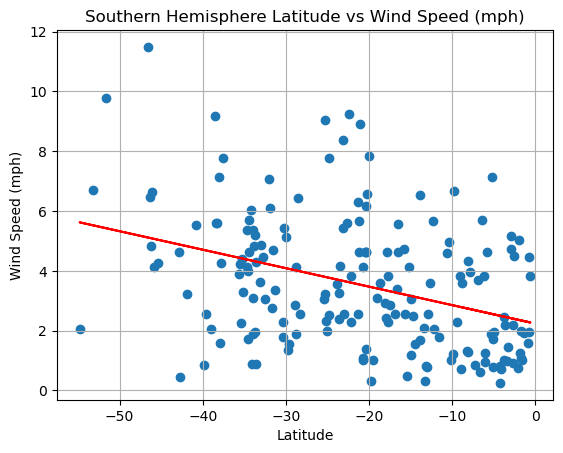

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Latitude"]
y_values = southern_hemi_df["Wind Speed (mph)"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis

y_label = "Wind Speed (mph)"
#give the title
plt.title('Southern Hemisphere Latitude vs Wind Speed (mph)')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig("output_data/RegPlot8.png")
plt.show()

**Discussion about the linear relationship:** 

For both Northern and Southern Hemisphere: The regression does not show a strong correlation and the data points also look scaterred. Therefore, there doesnt seem to be a corelation between Latitude and Humidity.
